# Impact-T fieldmap reconstruction

In [1]:
from impact import Impact, fieldmaps
from pmd_beamphysics.interfaces.impact import create_fourier_coefficients
import numpy as np

In [2]:
ifile = 'templates/lcls_injector/ImpactT.in'
I = Impact(input_file=ifile)

In [3]:
# Fieldmaps are stored here
I.input['fieldmaps'].keys()

dict_keys(['rfdata201', 'rfdata102', 'rfdata4', 'rfdata5', 'rfdata6', 'rfdata7'])

In [4]:
# Look at a solrf element. 
I.ele['SOL1']

{'description': 'name:SOL1',
 'original': '0.49308 0 0 105 0.0 0.0 0.0 0.0 102 0.15 0.0 0.0 0.0 0.0 0.0 0.2457 /!name:SOL1',
 'L': 0.49308,
 'type': 'solrf',
 'zedge': 0.0,
 'rf_field_scale': 0.0,
 'rf_frequency': 0.0,
 'theta0_deg': 0.0,
 'filename': 'rfdata102',
 'radius': 0.15,
 'x_offset': 0.0,
 'y_offset': 0.0,
 'x_rotation': 0.0,
 'y_rotation': 0.0,
 'z_rotation': 0.0,
 'solenoid_field_scale': 0.2457,
 's': 0.49308,
 'name': 'SOL1'}

In [5]:
# This is its fieldmap filename
I.ele['SOL1']['filename']

'rfdata102'

In [6]:
# That data is here. 
fmap = I.input['fieldmaps']['rfdata102']
fmap

{'info': {'format': 'solrf',
  'filePath': '/Users/chrisonian/Code/GitHub/lume-impact/docs/examples/templates/lcls_injector/rfdata102'},
 'field': {'Ez': {'z0': np.float64(0.0),
   'z1': np.float64(0.0),
   'L': np.float64(0.0),
   'fourier_coefficients': array([0.])},
  'Bz': {'z0': np.float64(-0.53308),
   'z1': np.float64(0.49308),
   'L': np.float64(1.02616),
   'fourier_coefficients': array([ 7.59104159e-01,  1.86860998e-01,  2.68209187e-09, -4.75732117e-01,
           5.68488796e-09, -2.63303014e-01, -2.00685489e-10,  8.31385362e-02,
          -1.07061180e-09,  3.32147505e-02,  3.34109023e-09, -4.03166145e-03,
           2.36977653e-09,  7.55695585e-02,  7.03628508e-09,  4.05472421e-02,
          -7.93679210e-09, -2.78630279e-02, -2.80674359e-08, -1.23309101e-02,
          -1.21750197e-08, -1.11917490e-03,  2.72183881e-08, -1.76941899e-02,
           2.07775590e-08, -6.82928971e-03, -4.64611502e-09,  9.04327137e-03,
          -2.74644209e-08,  3.46208848e-03,  1.22819960e-08,  4.

In [7]:
# Reconstruction function
fieldmaps.fieldmap_reconstruction_solrf(fmap['field']['Bz'], 0)

np.float64(0.006497827018877966)

# Basic plot

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [9]:
zlist = np.linspace(0, 0.49308, 1000)
fieldlist = [fieldmaps.fieldmap_reconstruction_solrf(fmap['field']['Bz'], z) for z in zlist]

In [10]:
# z at max field
zlist[np.argmax(np.array(fieldlist))]

np.float64(0.19496156156156158)

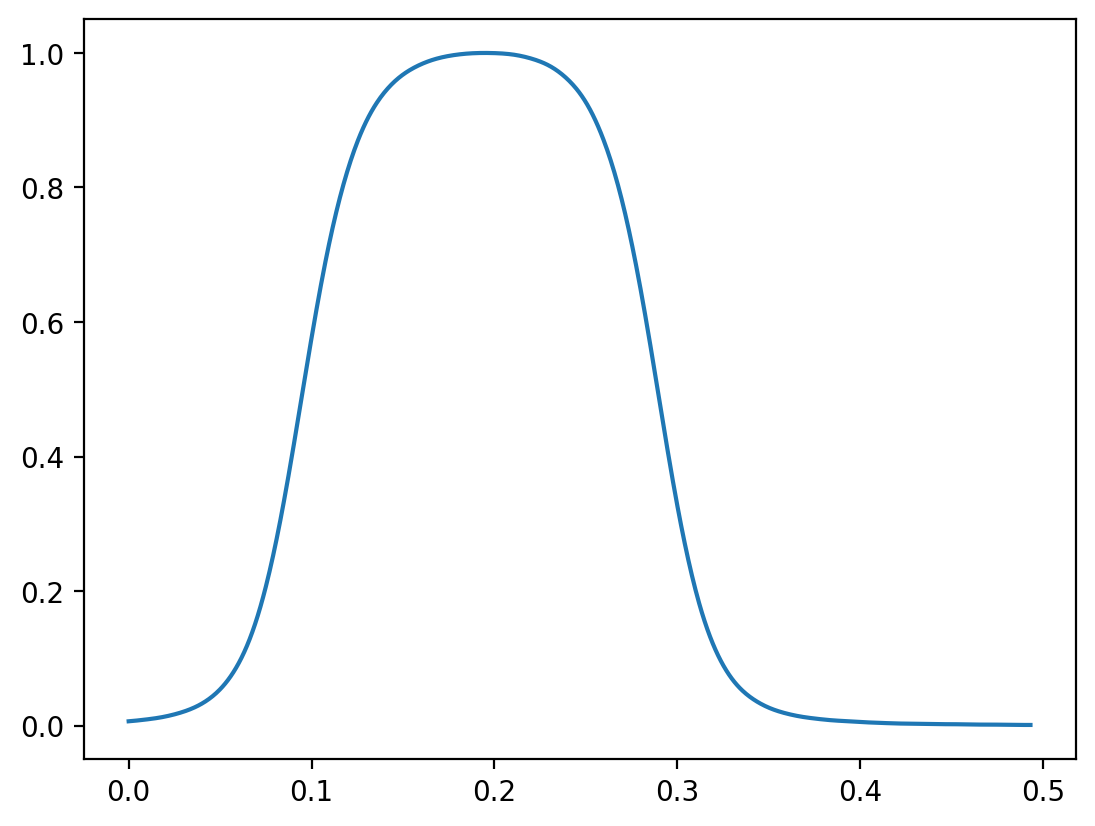

In [11]:
plt.plot(zlist, fieldlist);

In [12]:
# Integrated field (approximate)
field_scale = 0.243 # from imput file
BL = np.sum(fieldlist)*0.49308/1000  # T*m
BL * field_scale * 10 # T*m -> kG*m

np.float64(0.47251221486003464)

In [13]:
1/BL

np.float64(5.142724195436521)

# Create Fieldmap

In [14]:
fmap2 = fmap.copy()
fmap2['field']['Bz']['z0'] = min(zlist)
fmap2['field']['Bz']['z1'] = max(zlist)
fmap2['field']['Bz']['L'] = np.ptp(zlist)
fmap2['field']['Bz']['fourier_coefficients'] = create_fourier_coefficients(zlist, fieldlist, n=20)

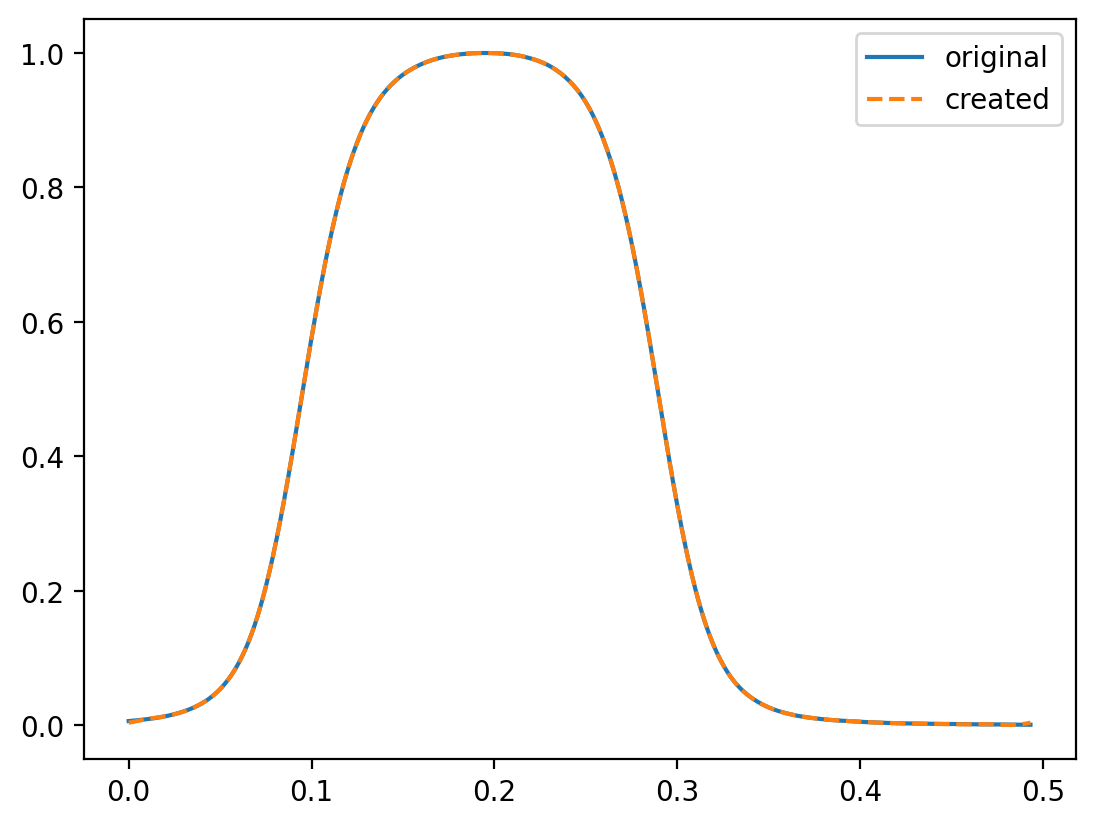

In [15]:
fieldlist2 = [fieldmaps.fieldmap_reconstruction_solrf(fmap2['field']['Bz'], z) for z in zlist]
plt.plot(zlist, fieldlist, label='original')
plt.plot(zlist, fieldlist2, '--', label='created')
plt.legend()

In [16]:
fmap2

{'info': {'format': 'solrf',
  'filePath': '/Users/chrisonian/Code/GitHub/lume-impact/docs/examples/templates/lcls_injector/rfdata102'},
 'field': {'Ez': {'z0': np.float64(0.0),
   'z1': np.float64(0.0),
   'L': np.float64(0.0),
   'fourier_coefficients': array([0.])},
  'Bz': {'z0': np.float64(0.0),
   'z1': np.float64(0.49308),
   'L': np.float64(0.49308),
   'fourier_coefficients': array([ 7.89495139e-01,  4.33867017e-01, -3.57732944e-01,  2.94026907e-02,
          -1.53404612e-01,  3.25260823e-02,  5.58082653e-02,  6.13403407e-02,
           2.39379983e-02,  3.57981962e-03, -1.24552364e-03, -1.02459657e-02,
           1.68094954e-02,  1.23265799e-03,  7.41061917e-03, -2.88377447e-03,
          -2.34475616e-03, -3.69833230e-03, -3.94627426e-04, -5.82441696e-05,
           1.26215240e-04,  3.02765112e-04, -1.36723089e-03, -2.26429980e-04,
          -2.39596500e-04,  3.45355578e-04, -4.64071534e-05,  2.62624018e-04,
           2.21612127e-05,  6.48490182e-05, -1.18646462e-04,  1.19955

In [17]:
from numpy import sin, cos, pi, arange

In [18]:
# Raw data from 
coefs = fmap2['field']['Bz']['fourier_coefficients']
coefs

array([ 7.89495139e-01,  4.33867017e-01, -3.57732944e-01,  2.94026907e-02,
       -1.53404612e-01,  3.25260823e-02,  5.58082653e-02,  6.13403407e-02,
        2.39379983e-02,  3.57981962e-03, -1.24552364e-03, -1.02459657e-02,
        1.68094954e-02,  1.23265799e-03,  7.41061917e-03, -2.88377447e-03,
       -2.34475616e-03, -3.69833230e-03, -3.94627426e-04, -5.82441696e-05,
        1.26215240e-04,  3.02765112e-04, -1.36723089e-03, -2.26429980e-04,
       -2.39596500e-04,  3.45355578e-04, -4.64071534e-05,  2.62624018e-04,
        2.21612127e-05,  6.48490182e-05, -1.18646462e-04,  1.19955063e-05,
        2.07495250e-04,  6.46051459e-05, -2.35246836e-05, -3.25265093e-05,
        1.09808260e-04, -1.75593316e-05, -9.23404592e-05])

In [19]:
A0 = coefs[0]    # constant factor
A  = coefs[1::2] # cos parts
B  = coefs[2::2] # sin parts 

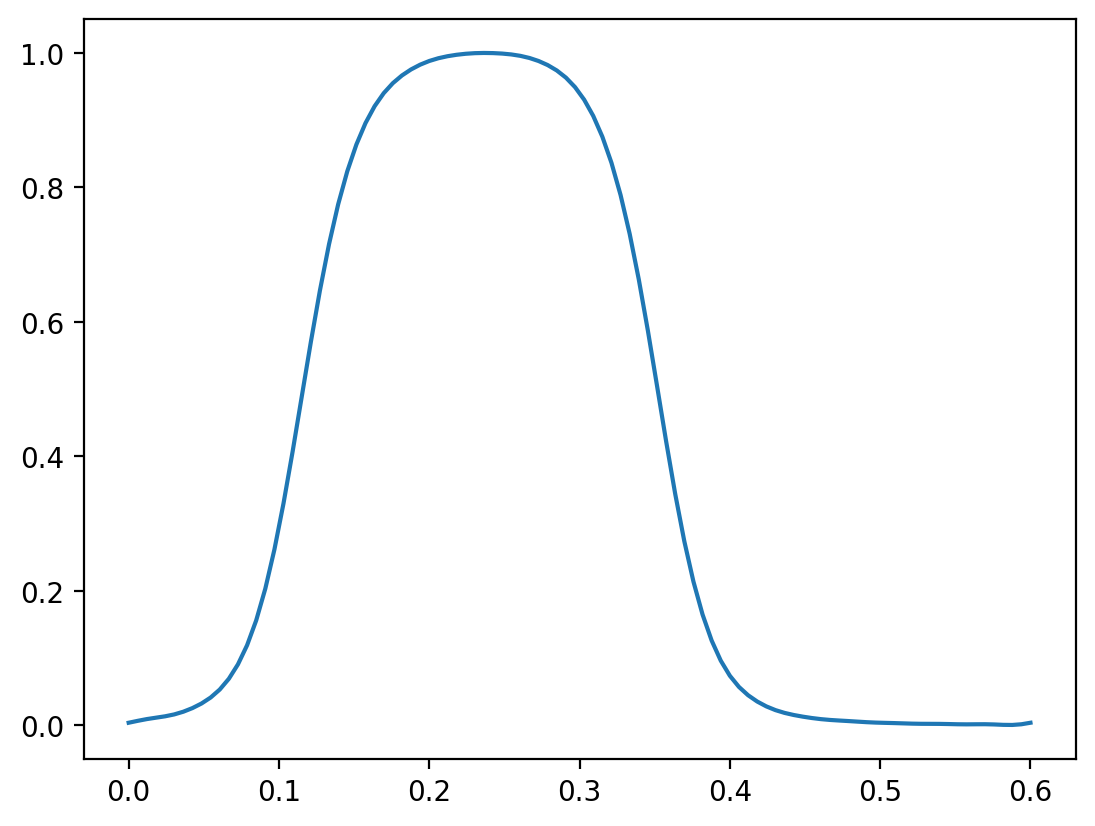

In [20]:
L = 0.6

@np.vectorize
def f(z):
    phase = 2*pi*(z/L-1/2)
    return A0/2 + sum([ A[n-1] * cos(n*phase)  + B[n-1] * sin(n*phase) for n in arange(1, len(A)+1)])


z0 = np.linspace(0, L, 100)

plt.plot(z0, f(z0))